## Resampling and permutations

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt

#### Primero cargamos los datos correspondientes al ejemplo de Beer and wings de Chihara 2019 capitulo 3

In [2]:
data_wings=pd.read_csv('Beer_wings.csv')

In [3]:
data_wings.head()

,Unnamed: 0,ID,Hotwings,Beer,Gender
0,1,1,4,24,F
1,2,2,5,0,F
2,3,3,5,12,F
3,4,4,6,12,F
4,5,5,7,12,F


### Problema

Queremos ver si las mujeres consumen menos alitas que los hombres en nuestra muestra

Ha: M(mujeres)< M(hombres)

H0: M(mujeres)=M(hombres)

##### Vemos como estan las medias de los subgrupos que nos interesan

In [4]:
means = data_wings.groupby(['Gender']).agg(['mean'])

In [5]:
means

,Unnamed: 0,ID,Hotwings,Beer
,mean,mean,mean,mean
Gender,,,,
F,10.333333,10.333333,9.333333,22.0
M,20.666667,20.666667,14.533333,30.4


In [6]:
beer_f=data_wings['Beer'][data_wings['Gender']=="F"].mean()
beer_m=data_wings['Beer'][data_wings['Gender']=="M"].mean()

wings_f=data_wings['Hotwings'][data_wings['Gender']=="F"].mean()
wings_m=data_wings['Hotwings'][data_wings['Gender']=="M"].mean()

Funcion auxiliar para sacar diferencia de medias por subgrupos

In [7]:
def get_diffmedias(x, y, axis):

    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

In [25]:
estadistico_observado=get_diffmedias(data_wings['Hotwings'][data_wings['Gender']=="M"], data_wings['Hotwings'][data_wings['Gender']=="F"], 0)

### Construccion de la distribucion de referencia

Since we will be working with the hot wings variable, we will create a vector holding these
values. Then, we will draw a random sample of size 15 from the numbers 1 through 30 (there
are 30 observations is total). The hot wing values corresponding to these positions will be values
for the males and the remaining ones for the females. The mean difference of this permutation
will be stored in result. This will be repeated many times.

In [10]:
alitas=data_wings['Hotwings'] #Separo mi columna de interes en la que voy a probar diferencia de medias
alitas.index

RangeIndex(start=0, stop=30, step=1)

In [35]:
#Numero de veces que repetiremos el proceso: Numero de veces que se hara el remuestreo
N=list(range(0,10**5))
n=10**5-1

In [36]:
#definiendo la distribucion bajo la hipotesis nula: Todas las repeticiones son 
dist_nula=[]
for i in N:
    index = random.sample(range(0,30),15)
    media1=data_wings['Hotwings'].iloc[index].mean()
    media2=data_wings['Hotwings'].iloc[data_wings.index.difference(index)].mean()
    dist_nula.append(media1-media2)

We first create a histogram of the permutation distribution and add a vertical line at the observed
mean difference.

### Visualizacion y resultados

Que tan tipico es el valor de mi diferencia de medias observada dentro de la distrbucion de referencia bajo la hipotesis nula?

Text(5.28, 6000, 'Diferencia\nobservada')

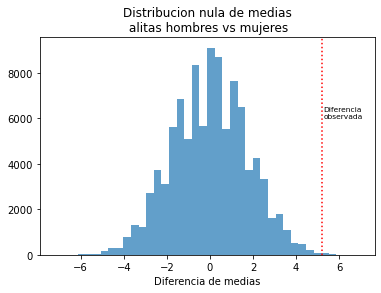

In [49]:
#Grafico mi distribucion de referencia bajo H0 y pongo una linea vertical en la media observada
plt.hist(dist_nula, alpha=0.7, bins=40)
plt.axvline(x=5.199, linestyle='dotted', color='red')
plt.title("Distribucion nula de medias\n alitas hombres vs mujeres")
plt.xlabel("Diferencia de medias")
plt.text(5.28,6000, 'Diferencia\nobservada',size=7.5)

Determinamos que tan probable es encontrar un valor como el observado

We determine how likely it is to obtain an outcome as large or larger than what we observed.

In [43]:
distribucion_nula=pd.DataFrame(dist_nula)
distribucion_nula

,0
0,-3.066667
1,-2.400000
2,2.000000
3,1.600000
4,-1.600000
...,...
99995,0.800000
99996,0.800000
99997,-2.266667
99998,0.933333


In [44]:
#numero de valores tan grandes como el observado
extremos=distribucion_nula[distribucion_nula>=estadistico_observado].count() 
#Calculamos el p_value
p_value=(extremos+1)/(n+1)

Thus, the computed P-value is
just the proportion of statistics (including the original) that are as large or larger than the original
mean difference.

In [50]:
p_value

0    0.00113
dtype: float64

#### Conclusion

Recordemos que intentamos probar una hipotesis de una cola:
Ho: M(hombres)=M(mujeres)
Ha: M(mujeres)< M(hombres)

En este caso al 1% de significancia podemos rechazar la hipotesis nula, se observa que el consumo promedio de alitas de los hombres en la muestra es mayor al de las mujeres con un nivel de significancia del 1%